In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Classification Reports and Confusion Matrices

In [2]:

with open('/content/classification_report_pytorch.json') as f:
    pytorch_report = json.load(f)

with open('/content/classification_report_logistic_regression.json') as f:
    logreg_report = json.load(f)

pytorch_cm = np.load('/content/confusion_matrix_pytorch.npy')
logreg_cm = np.load('/content/confusion_matrix_logistic_regression.npy')

# Extract Metrics

In [5]:

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
pytorch_metrics = [
    pytorch_report['accuracy'],
    pytorch_report['macro avg']['precision'],
    pytorch_report['macro avg']['recall'],
    pytorch_report['macro avg']['f1-score']
]
logreg_metrics = [
    logreg_report['accuracy'],
    logreg_report['macro avg']['precision'],
    logreg_report['macro avg']['recall'],
    logreg_report['macro avg']['f1-score']
]


df_compare = pd.DataFrame({
    'Metric': metrics,
    'PyTorch Model': pytorch_metrics,
    'LogReg Model': logreg_metrics
})


# Plot Classification Reports

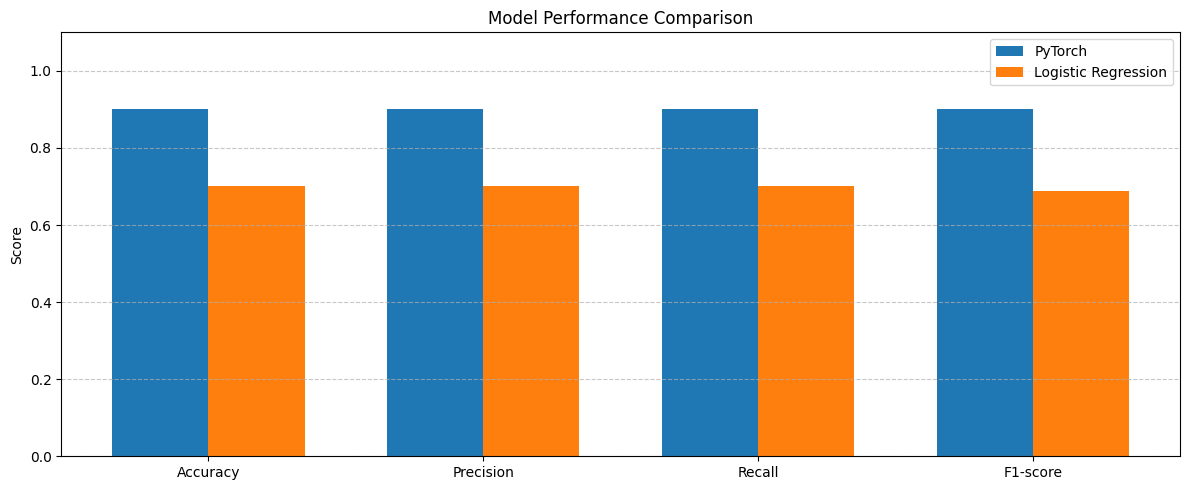

In [8]:

plt.figure(figsize=(12, 5))
bar_width = 0.35
x = np.arange(len(metrics))
plt.bar(x - bar_width/2, df_compare['PyTorch Model'], bar_width, label='PyTorch')
plt.bar(x + bar_width/2, df_compare['LogReg Model'], bar_width, label='Logistic Regression')

plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Confusion Matrices

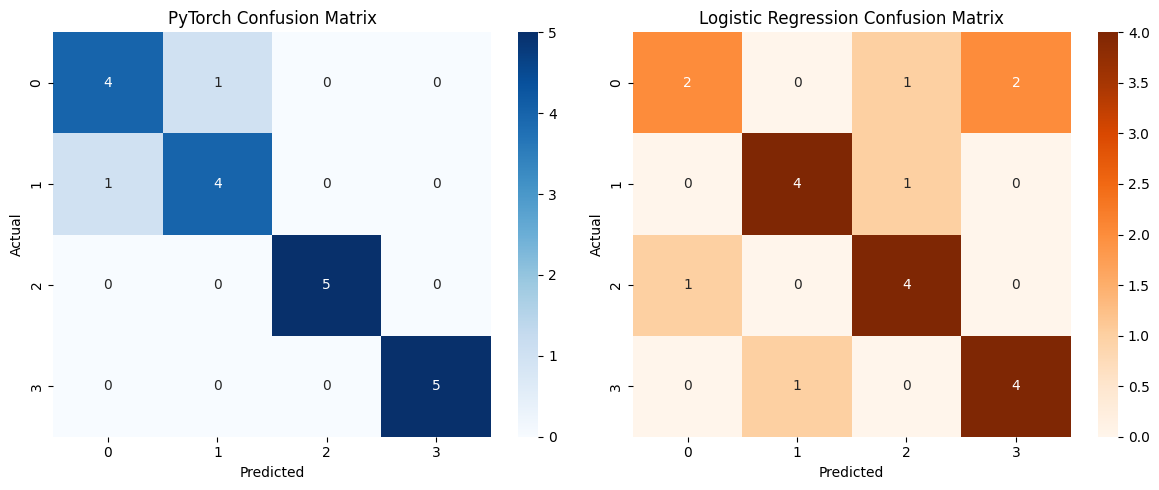

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(pytorch_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('PyTorch Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
